In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls

'analyzing tags.ipynb'		   models
 artists.txt			   movements.txt
 convnextv2_v2_selected_tags.csv   output.csv
 exclude_tags.csv		   requirements.txt
 flavors.txt			   swinv2_v2_selected_tags.csv
 fox_tagger.ipynb		   tags_explorer.ipynb
 inputs				   test_mediums.csv
 mediums.txt			   wd14-tagger.py


In [4]:
tag_data = pd.read_csv('output.csv')
tag_data

filename   
0      rank_153/abstract wallpaper, soft Holographic ...  \
1      rank_153/superintelligent AI Outbreak, singula...   
2            rank_153/attack on titan comes to tron .png   
3      rank_153/happy people at a technology conferen...   
4      rank_153/hair extensions sale. mediumshot of t...   
...                                                  ...   
10851  rank_383/a photomof an icebear  a photomof of ...   
10852  rank_383/one real penguin  one real polar bear...   
10853  rank_383/elegant Mudi dog in top hat, photogra...   
10854  rank_383/polar bear on an ice floe, photograph...   
10855  rank_383/unreal situation  one penguin and one...   

                                      tags:probabilities  
0      solo:0.4231683909893036, blurry:0.402657270431...  
1      solo:0.966153621673584, realistic:0.6967797875...  
2                         solo_focus:0.38329532742500305  
3      closed_eyes:0.6947624683380127, multiple_girls...  
4      solo:0.9741677045822144, realistic:0.805432915...  
...                                                  ...  
10851  water:0.5361649990081787, outdoors:0.510073065...  
10852  water:0.7702387571334839, outdoors:0.625067353...  
10853  looking_at_viewer:0.8424056768417358, simple_b...  
10854  cloud:0.6485034227371216, water:0.591051518917...  
10855  outdoors:0.756171464920044, cloud:0.6558051109...  

[10856 rows x 2 columns]

In [5]:
# Split the tags:probabilities column into separate rows
df = tag_data['tags:probabilities'].str.split(',', expand=True).stack().reset_index(level=-1, drop=True).rename('tags:probabilities').to_frame().join(tag_data[['filename']], how='left')
df

tags:probabilities   
0             solo:0.4231683909893036  \
0          blurry:0.40265727043151855   
1              solo:0.966153621673584   
1        realistic:0.6967797875404358   
1       upper_body:0.5917714834213257   
...                               ...   
10854        water:0.5910515189170837   
10854    outdoors:0.38133224844932556   
10855      outdoors:0.756171464920044   
10855        cloud:0.6558051109313965   
10855        water:0.6154978275299072   

                                                filename  
0      rank_153/abstract wallpaper, soft Holographic ...  
0      rank_153/abstract wallpaper, soft Holographic ...  
1      rank_153/superintelligent AI Outbreak, singula...  
1      rank_153/superintelligent AI Outbreak, singula...  
1      rank_153/superintelligent AI Outbreak, singula...  
...                                                  ...  
10854  rank_383/polar bear on an ice floe, photograph...  
10854  rank_383/polar bear on an ice floe, photograph...  
10855  rank_383/unreal situation  one penguin and one...  
10855  rank_383/unreal situation  one penguin and one...  
10855  rank_383/unreal situation  one penguin and one...  

[34972 rows x 2 columns]

In [6]:
# Split the tags:probabilities into separate columns
df[['tags', 'probabilities']] = df['tags:probabilities'].str.split(':', expand=True)
df

tags:probabilities   
0             solo:0.4231683909893036  \
0          blurry:0.40265727043151855   
1              solo:0.966153621673584   
1        realistic:0.6967797875404358   
1       upper_body:0.5917714834213257   
...                               ...   
10854        water:0.5910515189170837   
10854    outdoors:0.38133224844932556   
10855      outdoors:0.756171464920044   
10855        cloud:0.6558051109313965   
10855        water:0.6154978275299072   

                                                filename         tags   
0      rank_153/abstract wallpaper, soft Holographic ...         solo  \
0      rank_153/abstract wallpaper, soft Holographic ...       blurry   
1      rank_153/superintelligent AI Outbreak, singula...         solo   
1      rank_153/superintelligent AI Outbreak, singula...    realistic   
1      rank_153/superintelligent AI Outbreak, singula...   upper_body   
...                                                  ...          ...   
10854  rank_383/polar bear on an ice floe, photograph...        water   
10854  rank_383/polar bear on an ice floe, photograph...     outdoors   
10855  rank_383/unreal situation  one penguin and one...     outdoors   
10855  rank_383/unreal situation  one penguin and one...        cloud   
10855  rank_383/unreal situation  one penguin and one...        water   

             probabilities  
0       0.4231683909893036  
0      0.40265727043151855  
1        0.966153621673584  
1       0.6967797875404358  
1       0.5917714834213257  
...                    ...  
10854   0.5910515189170837  
10854  0.38133224844932556  
10855    0.756171464920044  
10855   0.6558051109313965  
10855   0.6154978275299072  

[34972 rows x 4 columns]

In [7]:
# Convert probabilities to float
df['probabilities'] = df['probabilities'].astype(float)
df

tags:probabilities   
0             solo:0.4231683909893036  \
0          blurry:0.40265727043151855   
1              solo:0.966153621673584   
1        realistic:0.6967797875404358   
1       upper_body:0.5917714834213257   
...                               ...   
10854        water:0.5910515189170837   
10854    outdoors:0.38133224844932556   
10855      outdoors:0.756171464920044   
10855        cloud:0.6558051109313965   
10855        water:0.6154978275299072   

                                                filename         tags   
0      rank_153/abstract wallpaper, soft Holographic ...         solo  \
0      rank_153/abstract wallpaper, soft Holographic ...       blurry   
1      rank_153/superintelligent AI Outbreak, singula...         solo   
1      rank_153/superintelligent AI Outbreak, singula...    realistic   
1      rank_153/superintelligent AI Outbreak, singula...   upper_body   
...                                                  ...          ...   
10854  rank_383/polar bear on an ice floe, photograph...        water   
10854  rank_383/polar bear on an ice floe, photograph...     outdoors   
10855  rank_383/unreal situation  one penguin and one...     outdoors   
10855  rank_383/unreal situation  one penguin and one...        cloud   
10855  rank_383/unreal situation  one penguin and one...        water   

       probabilities  
0           0.423168  
0           0.402657  
1           0.966154  
1           0.696780  
1           0.591771  
...              ...  
10854       0.591052  
10854       0.381332  
10855       0.756171  
10855       0.655805  
10855       0.615498  

[34972 rows x 4 columns]

In [8]:
# Print unique tags
print("Unique tags: ", df['tags'].unique())


Unique tags:  ['solo' ' blurry' ' realistic' ' upper_body' ' looking_at_viewer'
 'solo_focus' 'closed_eyes' ' multiple_girls' ' dark_skin'
 ' dark-skinned_female' 'jewelry' ' closed_eyes' 'white_background'
 ' painting_(medium)' ' water' ' from_behind' ' blurry_background'
 'realistic' ' indoors' ' book' 'looking_at_viewer' 'outdoors'
 ' signature' 'full_body' ' outdoors' ' chibi' ' solo' ' artist_name'
 ' cloud' ' day' 'blurry' ' blurry_foreground' ' simple_background'
 ' white_background' ' jewelry' 'painting_(medium)' ' full_body'
 ' from_side' 'multiple_girls' ' looking_back' ' monochrome'
 ' looking_to_the_side' ' blue_sky' ' shiny' 'cloud' ' nude' 'dark_skin'
 ' solo_focus' 'indoors' 'monochrome' ' greyscale' 'simple_background'
 ' food' 'greyscale' 'food' 'from_behind' ' motion_blur'
 ' real_world_location' 'book' 'water' ' painting_(object)' ' pillow'
 'surreal' 'english_text' ' english_text' 'shiny' 'motion_blur' ' surreal'
 ' gradient' ' gradient_background' ' indian_style' '

In [9]:
# Print tag frequency
print("\nTag frequency:\n", df['tags'].value_counts())


Tag frequency:
 tags
solo                  4100
 looking_at_viewer    2660
 realistic            2522
 outdoors             1792
 blurry               1467
                      ... 
dated                    1
twitter_username         1
 shiny_skin              1
 photo_inset             1
 two_side_up             1
Name: count, Length: 116, dtype: int64


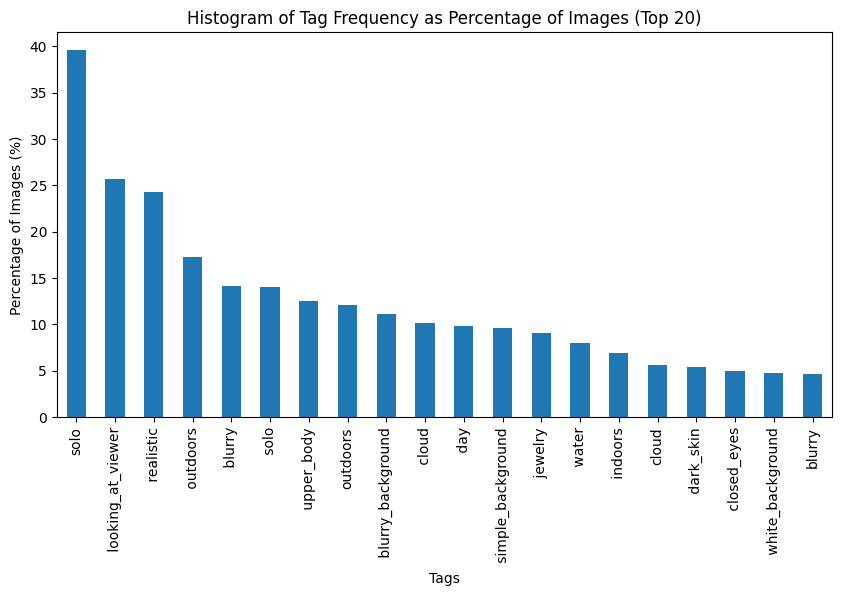

In [26]:
N = 20  # Top 20 tags
total_images = df['filename'].nunique()  # Count of unique images

tag_counts = df['tags'].value_counts()[:N] / total_images * 100  # Get tag counts as percentage of total images

plt.figure(figsize=(10,5))
tag_counts.plot(kind='bar')
plt.xlabel('Tags')
plt.ylabel('Percentage of Images (%)')
plt.title('Histogram of Tag Frequency as Percentage of Images (Top 20)')
plt.grid(False)
plt.show()

In [10]:
df

tags:probabilities   
0             solo:0.4231683909893036  \
0          blurry:0.40265727043151855   
1              solo:0.966153621673584   
1        realistic:0.6967797875404358   
1       upper_body:0.5917714834213257   
...                               ...   
10854        water:0.5910515189170837   
10854    outdoors:0.38133224844932556   
10855      outdoors:0.756171464920044   
10855        cloud:0.6558051109313965   
10855        water:0.6154978275299072   

                                                filename         tags   
0      rank_153/abstract wallpaper, soft Holographic ...         solo  \
0      rank_153/abstract wallpaper, soft Holographic ...       blurry   
1      rank_153/superintelligent AI Outbreak, singula...         solo   
1      rank_153/superintelligent AI Outbreak, singula...    realistic   
1      rank_153/superintelligent AI Outbreak, singula...   upper_body   
...                                                  ...          ...   
10854  rank_383/polar bear on an ice floe, photograph...        water   
10854  rank_383/polar bear on an ice floe, photograph...     outdoors   
10855  rank_383/unreal situation  one penguin and one...     outdoors   
10855  rank_383/unreal situation  one penguin and one...        cloud   
10855  rank_383/unreal situation  one penguin and one...        water   

       probabilities  
0           0.423168  
0           0.402657  
1           0.966154  
1           0.696780  
1           0.591771  
...              ...  
10854       0.591052  
10854       0.381332  
10855       0.756171  
10855       0.655805  
10855       0.615498  

[34972 rows x 4 columns]

In [13]:
# Define the number of buckets and the bucket size
num_buckets = 10
bucket_size = 0.1

# Add a new column for bucket assignment
df['bucket'] = pd.cut(df['probabilities'], bins=np.arange(0, 1.1, bucket_size))
df

tags:probabilities   
0             solo:0.4231683909893036  \
0          blurry:0.40265727043151855   
1              solo:0.966153621673584   
1        realistic:0.6967797875404358   
1       upper_body:0.5917714834213257   
...                               ...   
10854        water:0.5910515189170837   
10854    outdoors:0.38133224844932556   
10855      outdoors:0.756171464920044   
10855        cloud:0.6558051109313965   
10855        water:0.6154978275299072   

                                                filename         tags   
0      rank_153/abstract wallpaper, soft Holographic ...         solo  \
0      rank_153/abstract wallpaper, soft Holographic ...       blurry   
1      rank_153/superintelligent AI Outbreak, singula...         solo   
1      rank_153/superintelligent AI Outbreak, singula...    realistic   
1      rank_153/superintelligent AI Outbreak, singula...   upper_body   
...                                                  ...          ...   
10854  rank_383/polar bear on an ice floe, photograph...        water   
10854  rank_383/polar bear on an ice floe, photograph...     outdoors   
10855  rank_383/unreal situation  one penguin and one...     outdoors   
10855  rank_383/unreal situation  one penguin and one...        cloud   
10855  rank_383/unreal situation  one penguin and one...        water   

       probabilities      bucket  
0           0.423168  (0.4, 0.5]  
0           0.402657  (0.4, 0.5]  
1           0.966154  (0.9, 1.0]  
1           0.696780  (0.6, 0.7]  
1           0.591771  (0.5, 0.6]  
...              ...         ...  
10854       0.591052  (0.5, 0.6]  
10854       0.381332  (0.3, 0.4]  
10855       0.756171  (0.7, 0.8]  
10855       0.655805  (0.6, 0.7]  
10855       0.615498  (0.6, 0.7]  

[34972 rows x 5 columns]

In [20]:
tag_to_analyze = 'blurry'
num_buckets = 10

df['bucket'] = pd.cut(df['probabilities'], bins=num_buckets, labels=False)
selected_rows = pd.DataFrame()

for bucket in range(num_buckets):
    bucket_rows = df[df['tags'] == tag_to_analyze]
    bucket_rows = bucket_rows[bucket_rows['bucket'] == bucket].sample(3)
    selected_rows = pd.concat([selected_rows, bucket_rows])

selected_rows

tags:probabilities   
5787    blurry:0.3959270715713501  \
5222    blurry:0.4131569266319275   
879     blurry:0.3553133010864258   
6573    blurry:0.4470059275627136   
10709  blurry:0.45952045917510986   
7646    blurry:0.4162548780441284   
7927   blurry:0.49198809266090393   
2182    blurry:0.5393935441970825   
3011   blurry:0.48686888813972473   
311      blurry:0.552057147026062   
6732    blurry:0.5711941123008728   
4469    blurry:0.5772258639335632   
7874    blurry:0.6162235140800476   
3067    blurry:0.6416111588478088   
3530    blurry:0.6438701152801514   
7938    blurry:0.7145698070526123   
791     blurry:0.6758755445480347   
9264    blurry:0.6917563676834106   
3264    blurry:0.7890454530715942   
4528    blurry:0.7844282984733582   
5843    blurry:0.7933396697044373   
10576   blurry:0.8410934209823608   
2363    blurry:0.8584378361701965   
10557   blurry:0.8420693874359131   
8820    blurry:0.9111797213554382   
4904    blurry:0.8975179195404053   
460     blurry:0.9105137586593628   
8807    blurry:0.9544382095336914   
3521    blurry:0.9709577560424805   
7651    blurry:0.9852639436721802   

                                                filename    tags   
5787   other/puppet show with three puppets, bright c...  blurry  \
5222   other/Human three eyes, dark, putrefaction, be...  blurry   
879    rank_312/Realistic neon background with deep 3...  blurry   
6573   other/candid photography, new centurion mascot...  blurry   
10709  rank_21/Huge tiger alphamale, resting, side vi...  blurry   
7646   other/underwater coral reef that is made out o...  blurry   
7927   other/King Charles coronation, 19th century, f...  blurry   
2182   other/Japanese anime character mascot style, l...  blurry   
3011              other/guitar pedal, Atlanta hawks .png  blurry   
311    rank_2/backgammon stock image popular no text ...  blurry   
6732   other/Joan of Arc fighting with orcs in front ...  blurry   
4469   other/A spectacular high biological symmetrica...  blurry   
7874   other/wide shot 1990s Polaroid of a lion in Ne...  blurry   
3067   other/a closeup of a dark container of drugs, ...  blurry   
3530   other/company logo, chain links, create the le...  blurry   
7938   other/close up shot motherboard Macintosh. Top...  blurry   
791    rank_157/A disheveled, intoxicated man passion...  blurry   
9264   rank_179/cosmic anglerfish floating through th...  blurry   
3264   other/high quality, Full restaurant scene with...  blurry   
4528   other/a group of kids in 2022 in the red squar...  blurry   
5843   other/macro lens portrait of a vibrant cobalt ...  blurry   
10576  rank_19/a blue and white porcelaine of a nauti...  blurry   
2363   other/worker face, smiling face, latin guy, mi...  blurry   
10557  rank_19/Small droplets bounce up after hitting...  blurry   
8820   rank_3/close up on an exquisite menue in a mic...  blurry   
4904   other/minimalist agat stone background for the...  blurry   
460    rank_2/ordinated gummybears stock image popula...  blurry   
8807   rank_3/luxury liquor ad a martini served in el...  blurry   
3521   other/A highly accurate Chucky from Childs Pla...  blurry   
7651   other/A stunning high definition photograph, c...  blurry   

       probabilities  bucket  
5787        0.395927       0  
5222        0.413157       0  
879         0.355313       0  
6573        0.447006       1  
10709       0.459520       1  
7646        0.416255       1  
7927        0.491988       2  
2182        0.539394       2  
3011        0.486869       2  
311         0.552057       3  
6732        0.571194       3  
4469        0.577226       3  
7874        0.616224       4  
3067        0.641611       4  
3530        0.643870       4  
7938        0.714570       5  
791         0.675876       5  
9264        0.691756       5  
3264        0.789045       6  
4528        0.784428       6  
5843        0.793340       6  
10576       0.841093       7  
2363        0.858438       7  
10557       0.

In [49]:
# Choose a tag to analyze
tag_to_analyze = 'blurry'

# Lowercase and strip whitespaces
df['tags'] = df['tags'].str.lower().str.strip()

# Create a dataframe with probabilities associated with the chosen tag
df_tag = df[df['tags'] == tag_to_analyze][['tags', 'probabilities']]

# Display the dataframe
print(df_tag)

# Calculate the total number of occurrences of the chosen tag
total_occurrences = df[df['tags'] == tag_to_analyze].shape[0]

print(f"\nTotal occurrences of '{tag_to_analyze}': {total_occurrences}")


         tags  probabilities
0      blurry       0.402657
5      blurry       0.460198
7      blurry       0.482327
9      blurry       0.676133
11     blurry       0.735523
...       ...            ...
10841  blurry       0.685423
10842  blurry       0.911074
10843  blurry       0.398091
10849  blurry       0.764415
10850  blurry       0.523123

[1951 rows x 2 columns]

Total occurrences of 'blurry': 1951


In [52]:
# Create a DataFrame with tag counts
df_tags_count = pd.DataFrame(df['tags'].value_counts().reset_index())
df_tags_count.columns = ['tag', 'count']

# Save DataFrame to CSV
df_tags_count.to_csv('tag_counts.csv', index=False)

In [55]:
# Filter the dataframe to include only rows with a probability >= 0.3
df_high_prob = df[df['probabilities'] >= 0.5]

# Create a DataFrame with tag counts
df_tags_count_high_prob = pd.DataFrame(df_high_prob['tags'].value_counts().reset_index())
df_tags_count_high_prob.columns = ['tag', 'count']

# Save DataFrame to CSV
df_tags_count_high_prob.to_csv('tag_counts_high_prob.csv', index=False)


Enter the tag to analyze: blurry_background


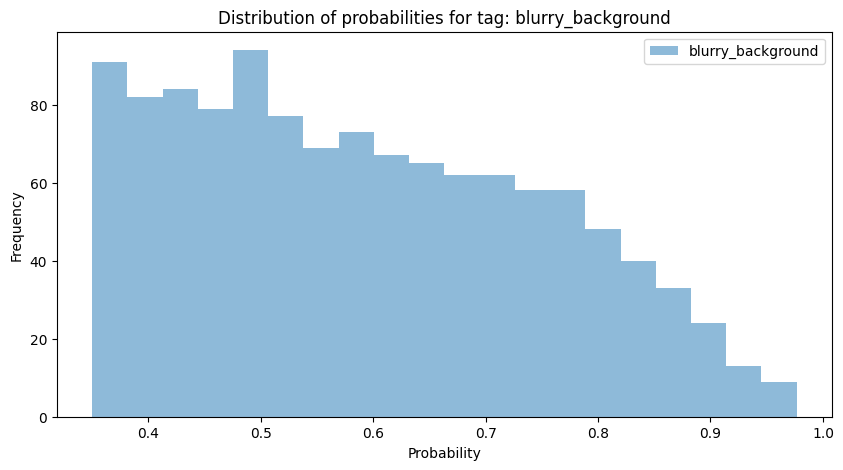

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Choose a tag to analyze
tag_to_analyze = input('Enter the tag to analyze: ').lower().strip()

# Lowercase and strip whitespaces
df['tags'] = df['tags'].str.lower().str.strip()

plt.figure(figsize=(10,5))

# Filter dataframe for chosen tag and plot histogram of probabilities
df[df['tags'] == tag_to_analyze]['probabilities'].hist(bins=20, alpha=0.5)

plt.legend([tag_to_analyze])
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title(f'Distribution of probabilities for tag: {tag_to_analyze}')
plt.grid(False)
plt.show()

In [21]:
# Filter rows where probability is >= 0.3
df_high_prob = df[df['probabilities'] >= 0.3]

# Replace underscores with spaces in tags
df_high_prob['tags'] = df_high_prob['tags'].str.replace('_', ' ')

# Group by filename, join tags with a comma and a space, and reset the index
df_final = df_high_prob.groupby('filename')['tags'].apply(', '.join).reset_index()

# Rename the column
df_final.columns = ['filename', 'final_tags']

# Display the final DataFrame
df_final

filename   
0      other/, trending on artstation, vertical kowlo...  \
1      other/. ultra detailed Cartoon CG elderly char...   
2      other/1 anime boy  medium long white hair  blu...   
3      other/1 anime boy, medium long white hair, blu...   
4      other/1 anime boy, white hair, blue eyes, whit...   
...                                                  ...   
10357  rank_99/photography of a highly detailed adora...   
10358  rank_99/photography wizard woman with cornflow...   
10359  rank_99/photography woman and baby daughter we...   
10360  rank_99/superb photography of a warrior girl w...   
10361  rank_99/superresolution photography of a woman...   

                                              final_tags  
0                                               outdoors  
1                                       jewelry,  blurry  
2      solo,  looking at viewer,  simple background, ...  
3      solo,  looking at viewer,  upper body,  day,  ...  
4      solo,  looking at viewer,  upper body,  blurry...  
...                                                  ...  
10357  solo,  looking at viewer,  blurry,  realistic,...  
10358               looking at viewer,  realistic,  solo  
10359                                jewelry,  realistic  
10360  solo,  blurry background,  jewelry,  looking a...  
10361  solo,  jewelry,  realistic,  indoors,  closed ...  

[10362 rows x 2 columns]

In [25]:
import os

# Base directory where your folders (rank_2, extra, rank_15, etc.) are located
base_dir = '/home/irakli/foxtagger/vokda_v3_prep'

# Iterate over rows in the DataFrame
for index, row in df_final.iterrows():
    # Get the filename and tags from the DataFrame
    filename = row['filename']
    tags = row['final_tags']

    # Remove the file extension from the filename
    filename = os.path.splitext(filename)[0]

    # Construct the path to the text file
    txt_file_path = os.path.join(base_dir, filename + '.txt')

    # Open the text file, read its contents, and prepend the new tags
    try:
        with open(txt_file_path, 'r+') as f:
            original_caption = f.read()
            f.seek(0)  # Set the pointer to the beginning of the file
            new_caption = tags + ', ' + original_caption
            f.write(new_caption)
    except FileNotFoundError:
        print(f"File {txt_file_path} not found.")

File /home/irakli/foxtagger/vokda_v3_prep/other/A highly accurate Michael Myers standing in the middle of a suburban street wearing an orange Balenc.txt not found.
File /home/irakli/foxtagger/vokda_v3_prep/other/Beautiful dark skin latina arabic moroccan Lebanese woman model with a dark hair wearing big small w.txt not found.
File /home/irakli/foxtagger/vokda_v3_prep/other/a highly accurate Jason Voorhees standing at the summer camp wearing a red Gucci suit, holding an ic.txt not found.
File /home/irakli/foxtagger/vokda_v3_prep/rank_176/Professional photo of a wood barrel of ginger on white background FFFFFF. Photo is taken from above .txt not found.
File /home/irakli/foxtagger/vokda_v3_prep/rank_291/Still from stylish cinematic historical masterpiece with grotesque and campy vibe titled the cheese .txt not found.
File /home/irakli/foxtagger/vokda_v3_prep/rank_297/Igbo Nigerian royal wedding .txt not found.
File /home/irakli/foxtagger/vokda_v3_prep/rank_297/Young Akan Ghanaian King and